# <a id='top'></a>
# Challenge Set 6
Topic:        Classification Errors  
Date:         8/1/2016  
Name:         Whitney Chia  
Worked with:  Cheated by looking at solutions for ROC and AUC parts

[Question 1](#question1)   
[Question 2](#question2)   
[Question 3](#question3)   
[Question 4](#question4)  
[Question 5](#question5)

<a id='question1'></a>
# Question 1  
[Top](#top)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
pd.options.display.max_rows = 999
plt.style.use('ggplot')
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette('dark')
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('house-votes-84.data', header=None)

In [3]:
df.columns = ['Party','handicapped_infants', 'water_project_cost_sharing',\
        'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',\
             'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',\
             'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue',\
             'crime', 'duty_free_exports', 'export_administration_act_south_africa']

In [4]:
df = df.replace(['republican', 'democrat', 'y','n', '?'], [0,1,1,0, np.nan])

In [5]:
df = df.astype(float)

In [6]:
df = df.fillna(df.mean())

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation as cv
from patsy import dmatrices

In [8]:
y, X = dmatrices('Party ~ handicapped_infants + water_project_cost_sharing\
        + adoption_of_the_budget_resolution + physician_fee_freeze + el_salvador_aid\
             + religious_groups_in_schools + anti_satellite_test_ban + aid_to_nicaraguan_contras\
             + mx_missile + immigration + synfuels_corporation_cutback + education_spending + superfund_right_to_sue\
             + crime + duty_free_exports + export_administration_act_south_africa', data=df, return_type='dataframe')

In [9]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=.30, random_state=4444)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
    print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
    print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
    print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 1 is: 0.900763358779
The precision score when K is 1 is: 0.910256410256
The recall score when K is 1 is: 0.922077922078
The f1 score when K is 1 is: 0.916129032258
The accuracy score when K is 2 is: 0.916030534351
The precision score when K is 2 is: 0.934210526316
The recall score when K is 2 is: 0.922077922078
The f1 score when K is 2 is: 0.928104575163
The accuracy score when K is 3 is: 0.900763358779
The precision score when K is 3 is: 0.910256410256
The recall score when K is 3 is: 0.922077922078
The f1 score when K is 3 is: 0.916129032258
The accuracy score when K is 4 is: 0.931297709924
The precision score when K is 4 is: 0.959459459459
The recall score when K is 4 is: 0.922077922078
The f1 score when K is 4 is: 0.940397350993
The accuracy score when K is 5 is: 0.916030534351
The precision score when K is 5 is: 0.923076923077
The recall score when K is 5 is: 0.935064935065
The f1 score when K is 5 is: 0.929032258065
The accuracy score when K is 6 is: 

/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [12]:
logreg = LogisticRegression(C=10)
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 20 is: 0.93893129771
The precision score when K is 20 is: 0.925925925926
The recall score when K is 20 is: 0.974025974026
The f1 score when K is 20 is: 0.949367088608


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
NB = GaussianNB()
NB.fit(x_train, y_train)
pred = NB.predict(x_test)
print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 20 is: 0.93893129771
The precision score when K is 20 is: 0.915662650602
The recall score when K is 20 is: 0.987012987013
The f1 score when K is 20 is: 0.95


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred = SVC.predict(x_test)
print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 20 is: 0.954198473282
The precision score when K is 20 is: 0.949367088608
The recall score when K is 20 is: 0.974025974026
The f1 score when K is 20 is: 0.961538461538


/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [15]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 20 is: 0.93893129771
The precision score when K is 20 is: 0.925925925926
The recall score when K is 20 is: 0.974025974026
The f1 score when K is 20 is: 0.949367088608


In [16]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print 'The accuracy score when K is ' + str(i) + ' is: ' + str(accuracy_score(y_test, pred))
print 'The precision score when K is ' + str(i) + ' is: ' + str(precision_score(y_test, pred))
print 'The recall score when K is ' + str(i) + ' is: ' + str(recall_score(y_test, pred))
print 'The f1 score when K is ' + str(i) + ' is: ' + str(f1_score(y_test, pred))

The accuracy score when K is 20 is: 0.93893129771
The precision score when K is 20 is: 0.948051948052
The recall score when K is 20 is: 0.948051948052
The f1 score when K is 20 is: 0.948051948052


/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


<a id='question2'></a>
# Question 2  
[Top](#top)

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


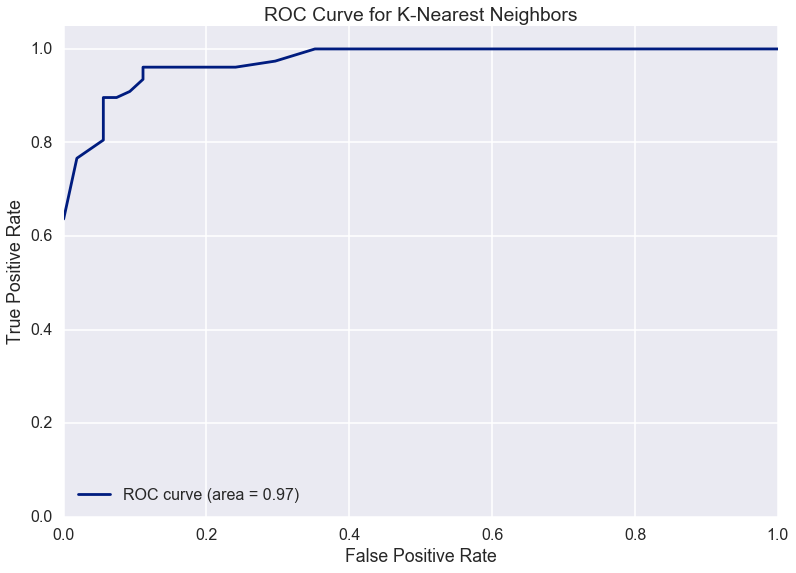

In [18]:
KNN = KNeighborsClassifier(n_neighbors=i)
KNN.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, KNN.predict_proba(x_test)[:,1])


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc='best')

/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


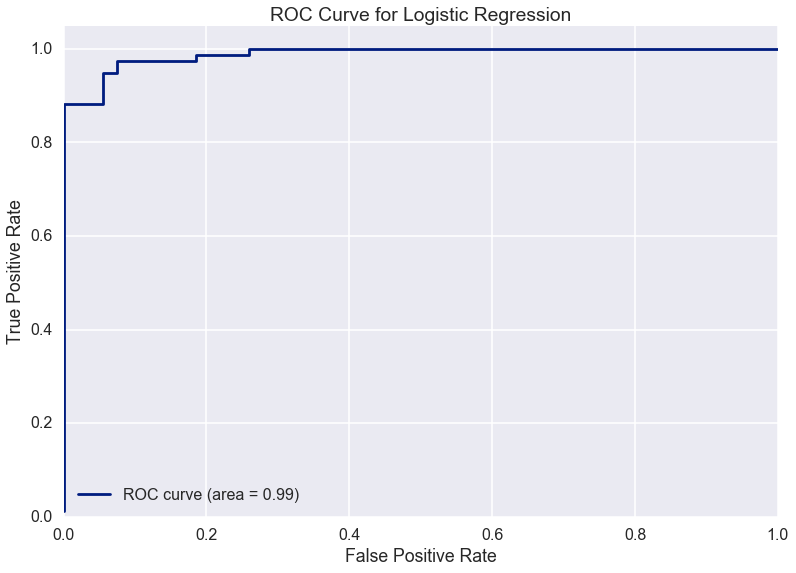

In [19]:
logreg.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')

/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


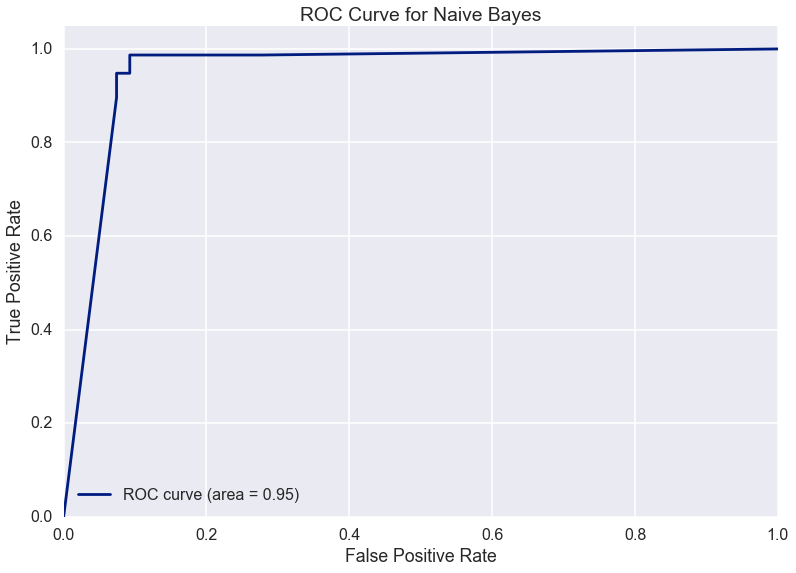

In [20]:
NB.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, NB.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, NB.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='best')

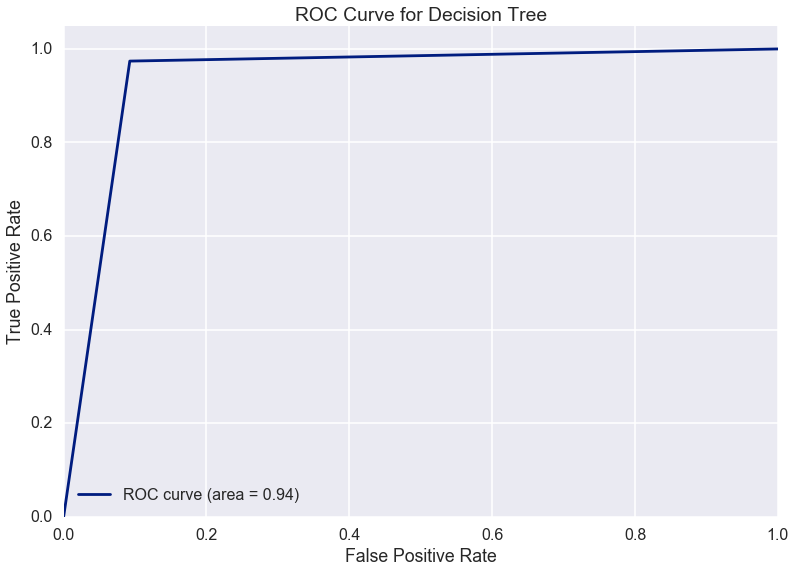

In [21]:
DTC.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, DTC.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, DTC.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='best')

/Users/whitneychia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


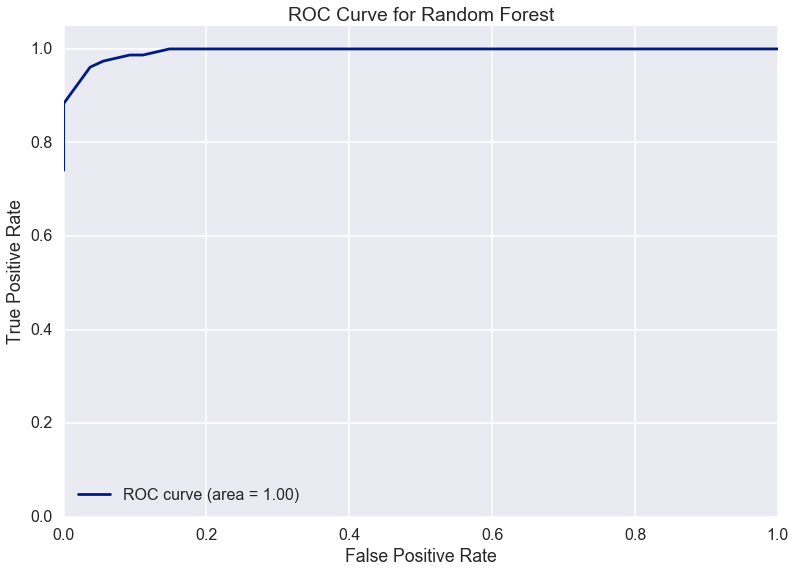

In [22]:
RFC.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, RFC.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, RFC.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='best')

# <a id='question3'></a>
# Question 3  
[Top](#top)

In [23]:
from sklearn.cross_validation import cross_val_score

In [24]:
KNN = KNeighborsClassifier(n_neighbors=9)
lr_cross_val = cross_val_score(logreg, x_train, y_train['Party'], scoring = 'precision')
knn_cross_val = cross_val_score(KNN, x_train, y_train['Party'])
NB_cross_val = cross_val_score(NB, x_train, y_train['Party'])
svc_cross_val = cross_val_score(SVC, x_train, y_train['Party'])
dtc_cross_val = cross_val_score(DTC, x_train, y_train['Party'])
rfc_cross_val = cross_val_score(RFC, x_train, y_train['Party'])

In [25]:
print 'Accuracy for log reg is: ' + str(np.mean(cross_val_score(logreg, x_train, y_train['Party'])))
print 'Precision for log reg is: ' + str(np.mean(cross_val_score(logreg, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for log reg is: ' + str(np.mean(cross_val_score(logreg, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for log reg is: ' + str(np.mean(cross_val_score(logreg, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for log reg is: 0.960654889018
Precision for log reg is: 0.968581989247
Recall for log reg is: 0.968584656085
F1 for log reg is: 0.968541994751


In [26]:
print 'Accuracy for KNN is: ' + str(np.mean(cross_val_score(KNN, x_train, y_train['Party'])))
print 'Precision for KNN is: ' + str(np.mean(cross_val_score(KNN, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for KNN is: ' + str(np.mean(cross_val_score(KNN, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for KNN is: ' + str(np.mean(cross_val_score(KNN, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for KNN is: 0.927781013395
Precision for KNN is: 0.961384335155
Recall for KNN is: 0.921296296296
F1 for KNN is: 0.940860215054


In [27]:
print 'Accuracy for Naive Bayes is: ' + str(np.mean(cross_val_score(NB, x_train, y_train['Party'])))
print 'Precision for Naive Bayes is: ' + str(np.mean(cross_val_score(NB, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for Naive Bayes is: ' + str(np.mean(cross_val_score(NB, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for Naive Bayes is: ' + str(np.mean(cross_val_score(NB, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for Naive Bayes is: 0.927748657219
Precision for Naive Bayes is: 0.9469192695
Recall for Naive Bayes is: 0.937003968254
F1 for Naive Bayes is: 0.941922259718


In [28]:
print 'Accuracy for SVC is: ' + str(np.mean(cross_val_score(SVC, x_train, y_train['Party'])))
print 'Precision for SVC is: ' + str(np.mean(cross_val_score(SVC, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for SVC is: ' + str(np.mean(cross_val_score(SVC, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for SVC is: ' + str(np.mean(cross_val_score(SVC, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for SVC is: 0.963922862875
Precision for SVC is: 0.98378003296
Recall for SVC is: 0.95808531746
F1 for SVC is: 0.970665983956


In [29]:
print 'Accuracy for DTC is: ' + str(np.mean(cross_val_score(DTC, x_train, y_train['Party'])))
print 'Precision for DTC is: ' + str(np.mean(cross_val_score(DTC, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for DTC is: ' + str(np.mean(cross_val_score(DTC, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for DTC is: ' + str(np.mean(cross_val_score(DTC, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for DTC is: 0.947388856533
Precision for DTC is: 0.963580810752
Recall for DTC is: 0.957837301587
F1 for DTC is: 0.960742368742


In [30]:
print 'Accuracy for RFC is: ' + str(np.mean(cross_val_score(RFC, x_train, y_train['Party'])))
print 'Precision for RFC is: ' + str(np.mean(cross_val_score(RFC, x_train, y_train['Party'], scoring = 'precision')))
print 'Recall for RFC is: ' + str(np.mean(cross_val_score(RFC, x_train, y_train['Party'], scoring = 'recall')))
print 'F1 for RFC is: ' + str(np.mean(cross_val_score(RFC, x_train, y_train['Party'], scoring = 'f1')))

Accuracy for RFC is: 0.94742121271
Precision for RFC is: 0.983512544803
Recall for RFC is: 0.947503306878
F1 for RFC is: 0.965073537064


# <a id='question4'></a>
# Question 4  
[Top](#top)

In [31]:
df3 = pd.read_csv('2013_movies.csv')

In [32]:
rating_dict = {'R':1,'PG-13':2 ,'PG':3,'G':4 }

df3['Rating_bin'] = [rating_dict[x] for x in df3['Rating']]

In [33]:
df3.dropna()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Rating_bin
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,3
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,3
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,2
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,2
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,2
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00,3
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,2013-05-16 00:00:00,2
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08 00:00:00,2


In [34]:
y, X = np.ravel(df3[['Rating_bin']]), df3[['Rating_bin', 'DomesticTotalGross']]

In [35]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=.30, random_state=4444)

In [36]:
logreg3 = LogisticRegression(C=.001)
logreg3 = logreg3.fit(x_train, y_train)
y_pred = logreg3.predict(x_test)

In [37]:
from sklearn.metrics import precision_recall_fscore_support

In [38]:
scores = precision_recall_fscore_support(y_test, y_pred, labels=[1,2,3,4], warn_for=('precision', 'recall', 'f-score'))

/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [39]:
print 'The precision for R, PG-13, PG, G  :' + str(scores[0])
print 'The recall for R, PG-13, PG, G:' + str(scores[1])
print 'The f_score for R, PG-13, PG, G:' + str(scores[2])

The precision for R, PG-13, PG, G  :[ 0.          0.46666667  0.          0.        ]
The recall for R, PG-13, PG, G:[ 0.  1.  0.  0.]
The f_score for R, PG-13, PG, G:[ 0.          0.63636364  0.          0.        ]


THIS LOOKS WRONG....I'll have to look into it later and re-submit.

# <a id='question5'></a>
# Question 5  
[Top](#top)

In [40]:
df4 = pd.read_csv('haberman.data', header=None)

In [41]:
df4.columns = ['age', 'year_operation', 'positive_nodes', 'survival_status']

In [42]:
y, X = dmatrices('survival_status ~ age + year_operation + positive_nodes', data=df4, return_type='dataframe')

In [43]:
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=.30, random_state=4444)

In [56]:
logreg_UCI = LogisticRegression(C = .001)
logreg_UCI.fit(x_train, y_train)

/Users/whitneychia/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
fpr, tpr, _ = roc_curve(y_test, logreg_UCI.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, logreg_UCI.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')

ValueError: Data is not binary and pos_label is not specified

I think my code is ok, I'm giving up cause I have to work on my project.